In [2]:
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Data Preparation

In [3]:
file = Path('crypto_data.csv')

In [4]:
crypto_df = pd.read_csv(file, index_col=0)
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [5]:
# List all algorithms in use
algorithms = set(crypto_df.Algorithm.values)
print(algorithms)

{'X11', 'Keccak', 'Scrypt-n', 'CryptoNight-V7', 'Exosis', 'Ethash', 'Proof-of-Authority', 'QuBit', 'Skein', 'VBFT', 'X16S', 'SHA-512', 'SHA3', 'YescryptR16', 'Lyra2RE', 'M7 POW', 'CryptoNight-Lite', 'Equihash', 'ECC 256K1', 'TRC10', 'Shabal256', 'XG Hash', 'M00N', 'QUAIT', 'Rainforest', 'Argon2d', 'Quark', 'Dagger-Hashimoto', 'Tribus', 'QuarkTX', 'Argon2', 'VeChainThor Authority', 'Slatechain', 'X11GOST', 'Multiple', 'SHA-256D', '1GB AES Pattern Search', 'Curve25519', 'BLAKE256', 'CryptoNight Heavy', 'Equihash+Scrypt', 'HybridScryptHash256', 'Stanford Folding', 'POS 3.0', 'Semux BFT consensus', 'Green Protocol', 'X15', 'CryptoNight-lite', 'Scrypt', 'Lyra2Z', 'XEVAN', 'Groestl', 'PoS', 'CryptoNight', 'HMQ1725', 'X14', 'Avesta hash', 'Lyra2REv2', 'SHA-256', 'PHI1612', 'CryptoNight Heavy X', 'NeoScrypt', 'Counterparty', 'Jump Consistent Hash', 'Momentum', 'Proof-of-BibleHash', 'C11', 'X13', 'Blake2S', 'SkunkHash v2 Raptor', 'IMesh', 'Progressive-n', 'Equihash1927', 'T-Inside', 'NIST5', 'O

In [6]:
# print the counts of stocks being currently traded vs. not being currently traded 
crypto_df["IsTrading"].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [7]:
# Select only cryptocurrencies that are being traded
crypto_df = crypto_df.loc[crypto_df["IsTrading"]==True]
crypto_df["IsTrading"].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [8]:
# Delete the IsTrading column; it is no longer necessary
crypto_df = crypto_df.drop("IsTrading", axis=1)
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [9]:
# Delete all rows with null values
crypto_df = crypto_df.dropna(axis=0, how='any')
crypto_df.shape

(685, 5)

In [10]:
# Sort values in TotalCoinsMined to identify negative or zero values
crypto_df.TotalCoinsMined.sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [11]:
# Select only rows with positive TotalCoinsMined values
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]>0]
len(crypto_df)

532

In [12]:
# Delete the CoinName column from the original dataframe
crypto_df = crypto_df.drop("CoinName", axis=1)
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [13]:
# Create dummy variables for columns with string values
dummy_x = pd.get_dummies(data=crypto_df, columns=["Algorithm", "ProofType"])
print(dummy_x.shape)
dummy_x.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Standardize the data
scaler = StandardScaler()
dummy_x_scaled = scaler.fit_transform(dummy_x)

In [15]:
# print the scaled data
dummy_x_scaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [16]:
# Identify the numbers of rows and columns in the scaled data
dummy_x_scaled.shape

(532, 98)

### Reduce dataset dimensions with PCA

In [17]:
# Reduce dimensions with PCA
pca = PCA(n_components=0.99)
principal_components = pca.fit_transform(dummy_x_scaled)
principal_components.shape

(532, 86)

In [18]:
# The sum of the explained variance of the principal components
pca.explained_variance_.sum()

97.3513331507577

In [19]:
# Reduce dimensions with PCA
# with 99% of the data
pca = PCA(n_components=0.90)
principal_components = pca.fit_transform(dummy_x_scaled)
principal_components.shape

(532, 74)

In [20]:
# The sum of the explained variance of the principal components
pca.explained_variance_.sum()

88.47283457566158

In [ ]:
# The number of features changes from 86 to 74,while explained variance changes from 97% to 88%.


In [23]:
# Reduce dimensions with t-SNE
tsne1 = TSNE(perplexity=50)
tsne1Features = tsne1.fit_transform(principal_components)
tsne1Features.shape

(532, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

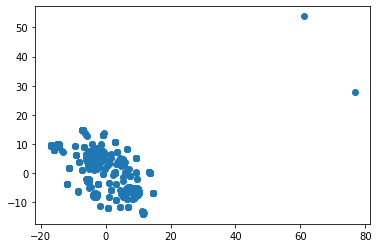

In [24]:
# Plot t-SNE output
x = tsne1Features[:,0]
y = tsne1Features[:,1]

plt.scatter(x,y)
plt.show

In [ ]:
# The TSNE output captures one cluster point for classification.TSNE as a model fails interms of as it does not produce multiple clusters
# which would have been benificial to the analysis of crypto dataset

In [25]:
# Identify clusters with k-means
inertia =[]
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for value in k:
    kmeans = KMeans(n_clusters = value, random_state=0)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

C:\Users\anton\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


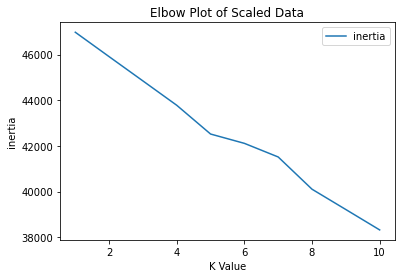

In [26]:
# Create an elbow plot
elbowPlot = pd.DataFrame({'k': k, "inertia": inertia})
elbowPlot.plot.line(x='k', y="inertia")
plt.ylabel("inertia")
plt.xlabel("K Value")
plt.title("Elbow Plot of Scaled Data")
plt.show()


In [ ]:
# The elbow plot has no decent clustering ,thus this model fails classification of the dataset